--------------- QUESTION 1----------------
QUESTION 1 (84464, 18)
  Australian... ForeignPor... passenger_... freight_in... mail_in_ou...
0      Adelaide      Auckland            IN            IN           OUT
1      Adelaide       Bahrain            IN           OUT          SAME
2      Adelaide        Bombay            IN          SAME          SAME
3      Adelaide     Frankfurt           OUT            IN           OUT
4      Adelaide        London            IN           OUT           OUT
--------------- QUESTION 2----------------
QUESTION 2 (13, 7)
  Australian...  PassengerI...  PassengerO...  FreightInC...  FreightOut...  MailInCoun...  MailOutCou...
0        Sydney           5025           5115           5944           4196           5704           4436
1     Melbourne           3191           2928           2837           3282           3547           2572
2      Brisbane           2310           2216           1491           3035           1509           3017
3         Perth 

NameError: name 'studentid' is not defined

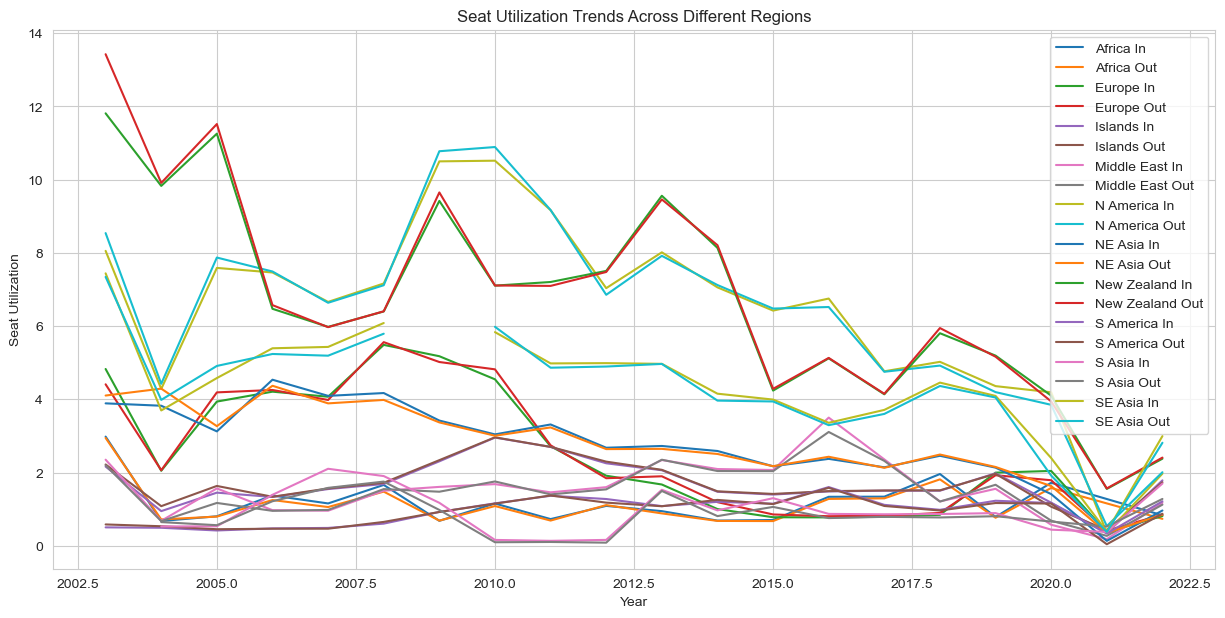

In [15]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import numpy as np
import math
import re

studentid = os.path.basename(sys.modules[__name__].__file__)


def log(question, output_df, other):
    print("--------------- {}----------------".format(question))

    if other is not None:
        print(question, other)
    if output_df is not None:
        df = output_df.head(5).copy(True)
        for c in df.columns:
            df[c] = df[c].apply(lambda a: a[:20] if isinstance(a, str) else a)

        df.columns = [a[:10] + "..." for a in df.columns]
        print(df.to_string())


def question_1(city_pairs):
    """
    :return: df1
            Data Type: Dataframe
            Please read the assignment specs to know how to create the output dataframe
    """

    #################################################
    # Your code goes here ...
    df1 = pd.read_csv(city_pairs);
    df1['passenger_in_out'] = df1.apply(lambda row: 'SAME' if row['Passengers_In'] == row['Passengers_Out'] else ('IN' if row['Passengers_In'] > row['Passengers_Out'] else 'OUT'), axis=1)
    df1['freight_in_out'] = df1.apply(lambda row: 'SAME' if row['Freight_In_(tonnes)'] == row['Freight_Out_(tonnes)'] else ('IN' if row['Freight_In_(tonnes)'] > row['Freight_Out_(tonnes)'] else 'OUT'), axis=1)
    df1['mail_in_out'] = df1.apply(lambda row: 'SAME' if row['Mail_In_(tonnes)'] == row['Mail_Out_(tonnes)'] else ('IN' if row['Mail_In_(tonnes)'] > row['Mail_Out_(tonnes)'] else 'OUT'), axis=1)
    #################################################

    log("QUESTION 1", output_df=df1[["AustralianPort", "ForeignPort", "passenger_in_out", "freight_in_out", "mail_in_out"]], other=df1.shape)
    return df1


def question_2(df1):
    """
    :param df1: the dataframe created in question 1
    :return: dataframe df2
            Please read the assignment specs to know how to create the output dataframe
    """

    #################################################
    # Your code goes here ...
    df22=df1.loc[df1['passenger_in_out'].isin(['IN', 'OUT']) & 
            df1['freight_in_out'].isin(['IN', 'OUT']) & 
            df1['mail_in_out'].isin(['IN', 'OUT'])].copy()

    df22=df22[df22['Month']>='Jan-85']
    
    df22['PassengerIn'] = df22['passenger_in_out'] == 'IN'
    df22['PassengerOut'] = df22['passenger_in_out'] == 'OUT'
    df22['FreightIn'] = df22['freight_in_out'] == 'IN'
    df22['FreightOut'] = df22['freight_in_out'] == 'OUT'
    df22['MailIn'] = df22['mail_in_out'] == 'IN'
    df22['MailOut'] = df22['mail_in_out'] == 'OUT'

    df2 = df22.groupby('AustralianPort').agg({
        'PassengerIn': 'sum', 
        'PassengerOut': 'sum', 
        'FreightIn': 'sum', 
        'FreightOut': 'sum', 
        'MailIn': 'sum', 
        'MailOut': 'sum'
    })

    df2.columns = ['PassengerInCount', 'PassengerOutCount', 'FreightInCount', 'FreightOutCount', 'MailInCount', 'MailOutCount']
    df2 = df2.sort_values('PassengerInCount', ascending=False)

    df2 = df2.reset_index()
#     df2
    #################################################

    log("QUESTION 2", output_df=df2, other=df2.shape)
    return df2


def question_3(df1):
    """
    :param df1: the dataframe created in question 1
    :return: df3
            Data Type: Dataframe
            Please read the assignment specs to know how to create the output dataframe
    """
    #################################################
    # Your code goes here ...
    df_in = df1[['Country', 'Passengers_In', 'Freight_In_(tonnes)', 'Mail_In_(tonnes)']].copy()
    df_out = df1[['Country', 'Passengers_Out', 'Freight_Out_(tonnes)', 'Mail_Out_(tonnes)']].copy()

    df_in['Month_count'] = 1
    df_out['Month_count'] = 1

    grouped_in = df_in.groupby(['Country']).sum()
    grouped_out = df_out.groupby(['Country']).sum()

    grouped_in = grouped_in.reset_index()
    grouped_out = grouped_out.reset_index()

    grouped_in['Passengers_in_average'] = (grouped_in['Passengers_In'] / grouped_in['Month_count']).fillna(0).round(2)
    grouped_in['Freight_in_average'] = (grouped_in['Freight_In_(tonnes)'] / grouped_in['Month_count']).fillna(0).round(2)
    grouped_in['Mail_in_average'] = (grouped_in['Mail_In_(tonnes)'] / grouped_in['Month_count']).fillna(0).round(2)

    grouped_out['Passengers_out_average'] = (grouped_out['Passengers_Out'] / grouped_out['Month_count']).fillna(0).round(2)
    grouped_out['Freight_out_average'] = (grouped_out['Freight_Out_(tonnes)'] / grouped_out['Month_count']).fillna(0).round(2)
    grouped_out['Mail_out_average'] = (grouped_out['Mail_Out_(tonnes)'] / grouped_out['Month_count']).fillna(0).round(2)

    df3 = pd.merge(grouped_in, grouped_out, on='Country')
    # df3 = grouped_in.set_index('Country').join(grouped_out.set_index('Country'))

    df3 = df3.sort_values('Passengers_in_average')

    df3 = df3.reset_index(drop=True)
    df3 = df3[['Country', 'Passengers_in_average', 'Passengers_out_average', 'Freight_in_average',
                      'Freight_out_average', 'Mail_in_average', 'Mail_out_average']]

    # df3.columns
    # df3
    #################################################

    log("QUESTION 3", output_df=df3, other=df3.shape)
    return df3


def question_4(df1):
    """
    :param df1: the dataframe created in question 1
    :return: df4
            Data Type: Dataframe
            Please read the assignment specs to know how to create the output dataframe
    """

    #################################################
    # Your code goes here ...
    df44 = df1[df1['Passengers_Out'] > 0]
    grouped = df44.groupby(["AustralianPort", "Country", "Month"]).agg({"ForeignPort": pd.Series.nunique})
    grouped = grouped[grouped["ForeignPort"] > 1]

    grouped = grouped.reset_index().groupby("Country").agg({"ForeignPort": pd.Series.count})
    grouped = grouped.sort_values(by=["ForeignPort", "Country"], ascending=[False, True])
    df4 = grouped.iloc[:5]
    df4
    #################################################

    log("QUESTION 4", output_df=df4, other=df4.shape)
    return df4


def question_5(seats):
    """
    :param seats : the path to dataset
    :return: df5
            Data Type: dataframe
            Please read the assignment specs to know how to create the  output dataframe
    """
    #################################################
    # Your code goes here ...
    df5 = pd.read_csv(seats);
    df5["Source_City"] = df5.apply(lambda row: row["International_City"] if row["In_Out"] == "I" else row["Australian_City"], axis=1)
    df5["Destination_City"] = df5.apply(lambda row: row["Australian_City"] if row["In_Out"] == "I" else row["International_City"], axis=1)
    df5
    #################################################

    log("QUESTION 5", output_df=df5, other=df5.shape)
    return df5


def question_6(df5):
    """
    :param df5: the dataframe created in question 5
    :return: df6
    """
    ########Comments################################
#     To integrate new or existing airline statistics to create a dataframe that understands routes, we can add relevant
#     columns such as Australian_City, International_City, Airline, All_Flights, Max_Seats, and two new focus columns.
#     Source_City and Destination_City. From this we can conclude that airlines are interested in understanding the demand 
#     for each route and the level of competition with other airlines operating the same route. 
#     To achieve this, we can calculate:

#     Total available flights and seats for each route:
#     We group the data by Source_City, Destination_City, and Airline to calculate the total number of flights and seats 
#     available for each airline.

#     Average number of seats per flight:
#     The average number of seats per flight can be calculated by dividing the total number of seats available on each 
#     route by the total number of flights.
    
#     Competing Airlines:
#     In order to count the number of each airline operating on each route, we group the data by Source City, Destination City,
#     and Airline. This will help us get a sense of how competitive each track is.

#     Passenger number:
#     We group the data by Source_City, Destination_City, and Airline and calculate the total number of passengers 
#     traveling on each route.

#     Seat load factor:
#     We then calculate the passenger load factor by dividing the total number of passengers traveling on each route by 
#     the total number of available seats.

#     After calculating the above metrics, we can create a dataframe. This data framework provides useful insight into 
#     the demand for each route and the level of competition among airlines. 
    #################################################
    # Your code goes here ...
    # create a new data frame with relevant columns
    df6 = df5[['Source_City', 'Destination_City', 'Airline', 'Year', 'Month', 'All_Flights', 'Max_Seats']]

    # group by Source_City, Destination_City, Airline, Year, and Month
    # and aggregate the total flights and max seats for each group
    df6 = df6.groupby(['Source_City', 'Destination_City', 'Airline', 'Year', 'Month']).agg({'All_Flights': 'sum', 'Max_Seats': 'sum'}).reset_index()

    # add a new column for the average seats per flight
    df6['Avg_Seats_Per_Flight'] = df6['Max_Seats'] / df6['All_Flights']

    # sort the data frame by Source_City, Destination_City, Airline, and Month
    df6 = df6.sort_values(['Source_City', 'Destination_City', 'Airline', 'Month'])

    # reset the index of the data frame
    df6 = df6.reset_index(drop=True)
    #################################################

    log("QUESTION 6", output_df=df6, other=df6.shape)
    return df6


def question_7(seats, city_pairs):
    """
    :param seats: the path to dataset
    :param city_pairs : the path to dataset
    :return: nothing, but saves the figure on the disk
    """
    ########Comments################################
#     To create a visualization for understanding seat occupancy, we will merge the two datasets city_pairs.csv and Seats.csv into common columns
#     Year and Port_Region. Then create two new column called "In_Utilization" and "Out_Utilization". These two columns represents the ratio of
#     total inbound and outbound passengers to the maximum number of seats.
    
#     Next, use the plt library in Python to create a line chart to visualize seat occupancy trends over time in different regions of the world.
#     Group the data by region using the Port_Region column and plot each region as a separate line on the same graph.

#     The resulting visualization shows temporal trends in seat occupancy in different regions of the world. You can observe areas with consistently 
#     high or low seat utilization and see seasonal patterns in the data. This information will help airlines adjust overselling margins or seat capacity 
#     to maximize profitability. 
    #################################################
    # Your code goes here ...
    # load the datasets
    seats = pd.read_csv(seats)
    city_pairs = pd.read_csv(city_pairs)

    merged_df = pd.merge(seats, city_pairs, how="inner", left_on=["Australian_City", "International_City", "Month_num", "Year", "Month"], right_on=["AustralianPort", "ForeignPort", "Month_num", "Year", "Month"])
    merged_df = merged_df.drop_duplicates()
    # create a new column for seat utilization
    merged_df["In_Utilization"] = merged_df["Passengers_In"] / merged_df["Max_Seats"]
    merged_df["Out_Utilization"] = merged_df["Passengers_Out"] / merged_df["Max_Seats"]


    # group the data by region and month
    grouped_df = merged_df.groupby(["Port_Region", "Year"]).mean().reset_index()

    # create a line plot to visualize trends over time for seat utilization across different regions of the world
    fig, ax = plt.subplots(figsize=(15,7))
    for region in grouped_df["Port_Region"].unique():
        region_df = grouped_df[grouped_df["Port_Region"] == region]
        ax.plot(region_df["Year"], region_df["In_Utilization"], label=f"{region} In")
        ax.plot(region_df["Year"], region_df["Out_Utilization"], label=f"{region} Out")
    ax.legend()
    ax.set_title("Seat Utilization Trends Across Different Regions")
    ax.set_xlabel("Year")
    ax.set_ylabel("Seat Utilization")
    ax.legend()
#     plt.show()
    
    #################################################

    plt.savefig("{}-Q7.png".format(studentid))


if __name__ == "__main__":
    df1 = question_1("city_pairs.csv")
    df2 = question_2(df1.copy(True))
    df3 = question_3(df1.copy(True))
    df4 = question_4(df1.copy(True))
    df5 = question_5("seats.csv")
    df6 = question_6(df5.copy(True))
    question_7("seats.csv", "city_pairs.csv")